In [51]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from src.finance_post_process import get_finance_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
def plot_data (x,y,xlabel='no label',ylabel='no label',title='no title',color='red'):
    plt.rc('font', size=20) 
    plt.figure(figsize=[20,8])
    plt.plot(x,y,'*-',color=color,markersize=20)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## Variables
Explaination of the variables used
- **start_year** : The year at which you start your career
- **years_of_service** : Your career duration
- **joining_salary** : The first base salary per annum that you draw
- **tax_rate** : Income tax rate incurred per annum
- **monthly expense** : Expenditure per month
- **expense_rate** : Rate at which yearly expenditure increases
- **growth_rate** : Rate at which you plan to grow your investments
- **cash_retain_perc** : Percentage of your yearly savings that you plan to retain. The rest of it will be invested

The default values used in the below cell are the assumptions made for a typical new college grad with a masters degree working in California.

Feel free to change the values.

In [53]:
start_year       = 2019
joining_salary   = 105000
tax_rate         = 30
monthly_expense  = 3000
expense_rate     = 2
growth_rate      = 8
years_of_service = 20
cash_retain_perc = 60

In [54]:
df = get_finance_df(start_year=start_year,joining_salary=joining_salary,tax_rate=tax_rate,monthly_expense=monthly_expense,
                   expense_rate=expense_rate,growth_rate=growth_rate,years_of_service=years_of_service,cash_retain_perc=cash_retain_perc)
df

,year,yearly_income_pre_taxed,hike_perc,yearly_income_post_taxed,yearly_expenditure,yearly_savings,cash_retained,cash_invested,ROI
0,2019,105000,0,73500,36000,37500,22500,15000,69914
1,2020,107100,2,74970,36720,38250,22950,15300,71312
2,2021,111384,4,77968,37454,40514,24308,16205,75534
3,2022,113611,2,79528,38203,41324,24794,16529,77045
4,2023,115883,2,81118,38967,42151,25290,16860,78585
5,2024,120519,4,84363,39746,44616,26769,17846,83182
6,2025,122929,2,86050,40541,45508,27305,18203,84846
7,2026,125388,2,87771,41352,46419,27851,18567,86542
8,2027,130403,4,91282,42179,49102,29461,19641,91546
9,2028,133011,2,93108,43023,50084,30050,20033,93377


## The Bitter Truth
- Investing your savings is really important for a secure future.
- Meeting your financial aspirations solely on your yearly savings is extremely difficult.
- Yearly savings will help you to sustain. But inorder to achieve your financial dreams , you need to invest with a good rate of return.
- The corpus that you intend to build at the end of the defined period is sensitive to the rate of return the investment generates. A small variation to rate can have a big impact on the corpus (shown later)
- Choose an instrument that best suits your risk and return appetite
- Equity should be a part of your investment if you want to beat the inflation in the long run

Text(0.5,1,'The Bitter Truth (Why you should invest ?)')

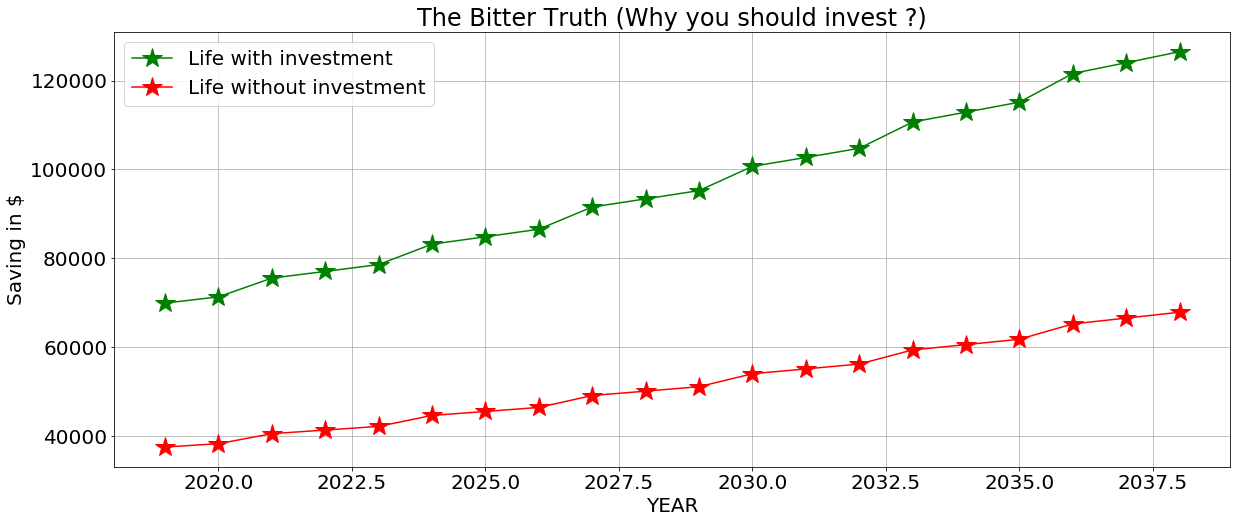

In [55]:
plt.rc('font', size=20) 
plt.figure(figsize=[20,8])
plt.plot(df.year,df.ROI,'*-',color='green',markersize=20,label='Life with investment')
plt.plot(df.year,df.yearly_savings,'*-',color='red',markersize=20,label='Life without investment')
plt.legend()
plt.grid()
plt.xlabel('YEAR')
plt.ylabel('Saving in $')
plt.title('The Bitter Truth (Why you should invest ?)')

# Lets get 'Trend'y

- The analysis done so far had all the finance parameter fixed to a particular value. 
- Inorder to get an idea about what growth rate and base salary suits your financial aspiration , we need to analyse how the Return on Investment varies with these financial parameters

## How does Return on Investment vary with time ??
- In the below plot , the growth rate on your investment is assumes to be fixed each year.(One can debate if this is a fair assumption. But lets keep our model simple). The point here is to convey the message "Need for investment".
- The trend is fairly linear for a given growth rate. The bends in the curve are due to hike in salary which results in higher ROI.
- Try changing the growth rate in variable section inorder to see if you are able to meet you financial goal.

***Are you able to meet your financial target ??***

If not , then you better start thinking about improving your growth rate on investment.

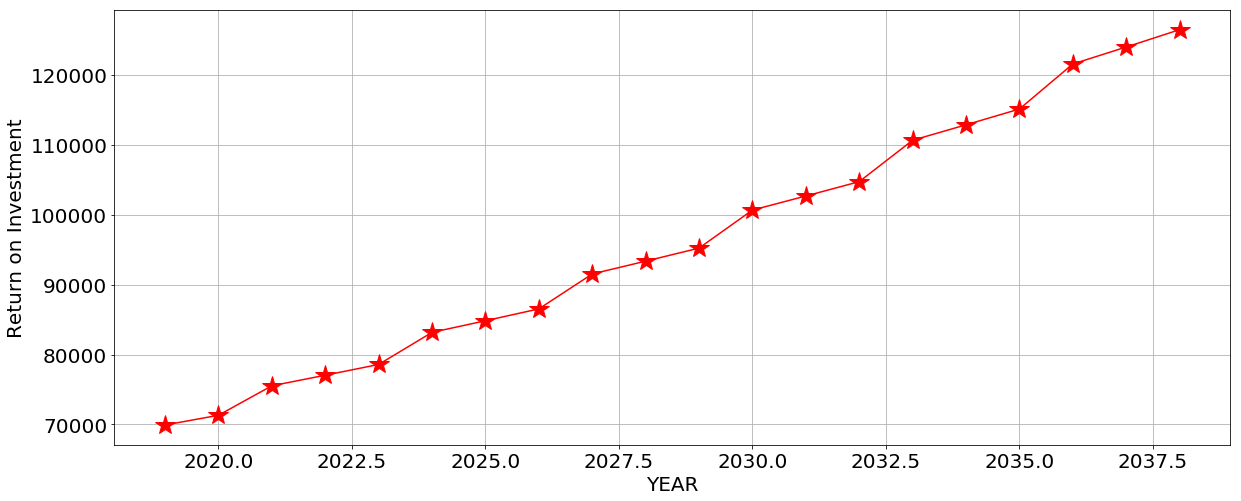

In [56]:
plot_data(x=df.year,y=df.ROI,color='red',xlabel='YEAR',ylabel='Return on Investment')

## How does Return on Investment vary with growth rate ??

> "Compund interest is the eight wonder of the world. He who understands it , earns it. He who doesn't , pays it"
> \- Albert Einstein


- The trend between ROI and growth rate is exponential. That's the beauty of compound interest. Even a minor change in annual growth rate can make you a millionaire. 
- It would be interesting to see at what growth rate you are able to achieve a financial target of 1 Million USD
- Maintaining a steady growth rate over 10% is not a joke.

***Are you able to meet your financial target at lower growth rate ??***

If not , then you better start thinking about improving your growth rate on investment.

In [57]:
rate = np.arange(2,12)
ROI = np.array([get_finance_df(growth_rate=r).sum()['ROI'] for r in rate])

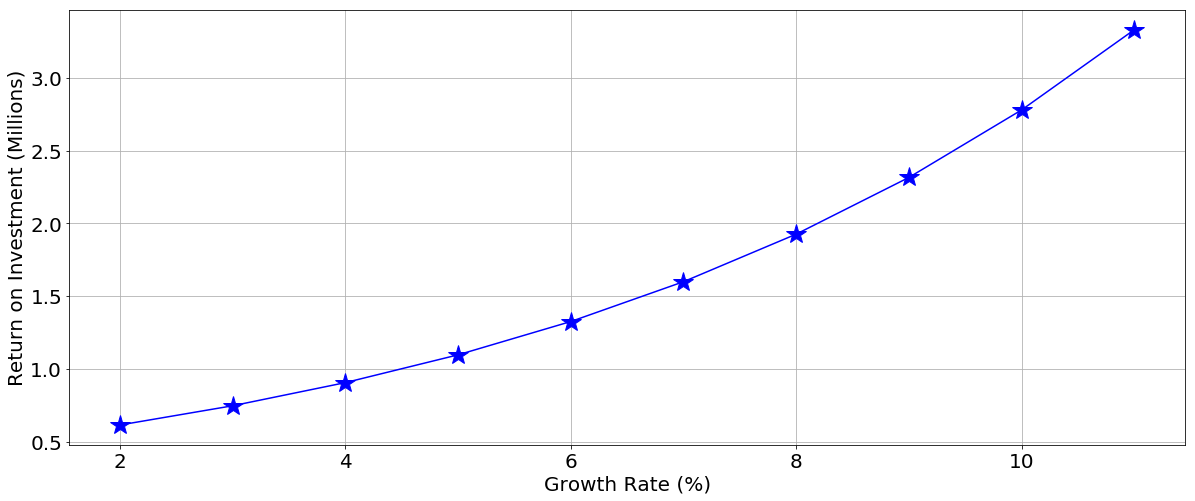

In [58]:
plot_data(x=rate,y=ROI/1e6,color='blue',xlabel='Growth Rate (%)',ylabel='Return on Investment (Millions)')

## How does Return in Investment vary with your base salary

- Many people who are amatuer in finance , have this wrong notion that base salary is more important than your investment strategy. 
- There is no denying the fact that base salary places a crucial role. But its very important to understand that the impact of growth rate on your ROI is much more than that of base salary
- To prove this point , lets see how the ROI varies with base salary.

In [59]:
base_salary = np.arange(90000,140000,10000)
ROI = np.array([get_finance_df(joining_salary=base).sum()['ROI'] for base in base_salary])

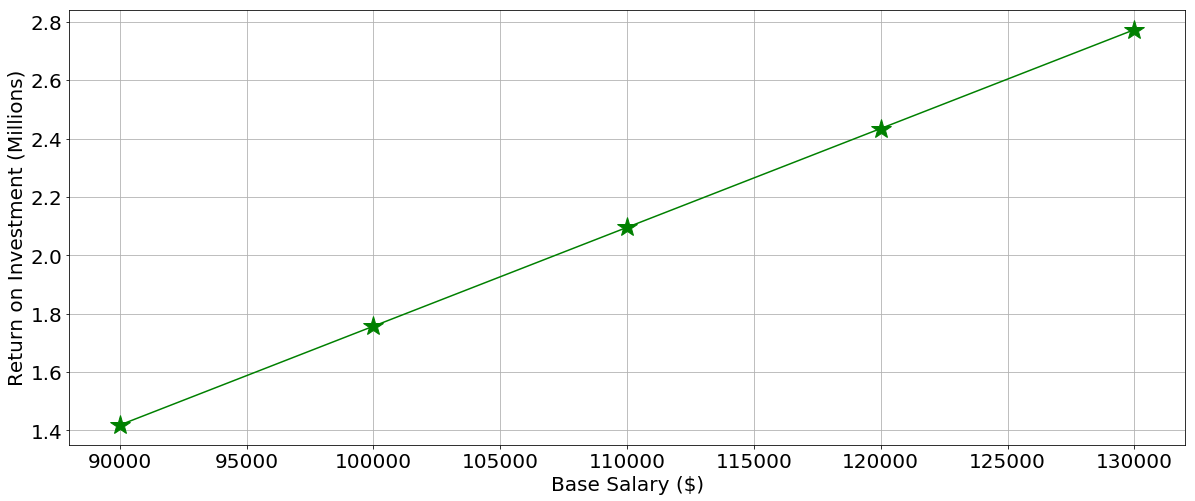

In [60]:
plot_data(x=base_salary,y=ROI/1e6,color='green',xlabel='Base Salary ($)',ylabel='Return on Investment (Millions)')

## High risk equates to higher returns , but how ??

- You might have already come across this statement "High risk pays higher returns". Lets see this in action
- $risk = 100 - cash\_retain\_perc$ indicates how much of your savings you are willing to risk. This can be considered as your risk factor

***At what risk factor are you able to reach your financial goal ?? Accordinly decide if you need to a safe investor or a high risk taking investor***

In [61]:
risk_factor = np.arange(10,100,10)
ROI = np.array([get_finance_df(cash_retain_perc=100-risk).sum()['ROI'] for risk in risk_factor])

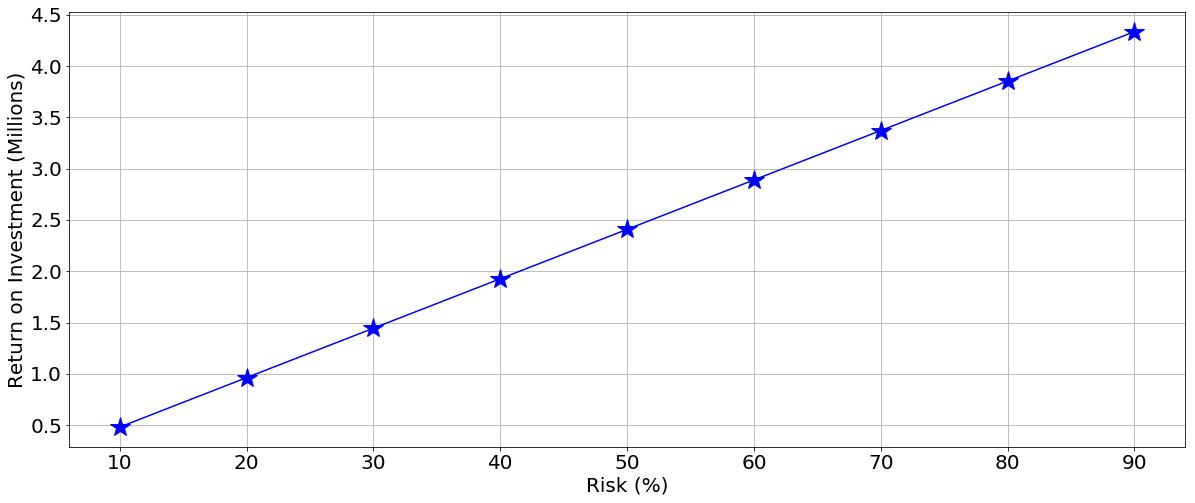

In [63]:
plot_data(x=risk_factor,y=ROI/1e6,color='blue',xlabel='Risk (%)',ylabel='Return on Investment (Millions)')